# Project 1: SAT & ACT Analysis

## Problem Statement

To increase SAT participation rate in the United States by examining competitor's participation rate and education policies that influence the business of College Board. 

## Executive Summary

### Organization Overview

College Board is a national education nonprofit that aims to expand college accessibility to all students in the United States. Its core products are Advanced Placement tests, SAT, and the PSAT. Currently, there are 16 states and the District of Columbia have contracts with College Board to adminster state-funded SAT to all high school students (College Raptor). The College Board's competitor, ACT, offer free tests to all juniors in 16 states (College Raptor). 

### Market Analysis

According to the Washington Post in 2018, the SAT has regained its position as the most popular test among high school graduates. This is attributable to the multi-year contracts that the College Board has secured in states like Colorado and Illinois where the participation percentage spiked 89% and 90% respectively. To ensure that Colleg Board is expanding students' access to higher education, College Board needs to increase participation rate in 50 states. This analysis examines the participation percentage of SAT and ACT in 2017 and 2018 to find where College Board can capture the opporunity to increase its presence. In addition, it will look at the success stories of states like Illinois and Colorado to replicate the efforts in states where it is appropriate. 


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

College Raptor. https://www.collegeraptor.com/getting-in/articles/act-sat/states-act-sat-given-free/

*All libraries used should be added here*

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
sat_2017 = pd.read_csv('~/DSI/projects/project_1/data/sat_2017.csv')
act_2017 = pd.read_csv('~/DSI/projects/project_1/data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
sat_2017.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [5]:
act_2017.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [6]:
sat_2017.shape

(51, 5)

In [7]:
act_2017.shape

(52, 7)

In [8]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [9]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [10]:
sat_2017.describe()

Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000

In [11]:
act_2017.describe()

English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.525000
max    25.500000  25.300000  26.000000  24.900000

Since the format of ACT and SAT are a little different, there are more columns in the ACT dataframe. The ACT data frame also includes an aggregate national average which is missing from the SAT dataframe. 

#### 4a. Does the data look complete? 

In [12]:
sat_2017.isna().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [13]:
act_2017.isna().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Answer: Yes, since the code calculates the total of the data that is missing a value, zero means that none of the values is missing. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [14]:
def min_max (dataframe, columns=list):
    for column in columns:
        print ("The max {} score is {}. The min {} score is {}.".format(column, dataframe[column].max(), column, dataframe[column].min()))

In [15]:
min_max(sat_2017, ['Evidence-Based Reading and Writing', 'Math', 'Total'])

The max Evidence-Based Reading and Writing score is 644. The min Evidence-Based Reading and Writing score is 482.
The max Math score is 651. The min Math score is 52.
The max Total score is 1295. The min Total score is 950.


In [16]:
min_max(act_2017, ['English', 'Math', 'Reading', 'Science','Composite'])

The max English score is 25.5. The min English score is 16.3.
The max Math score is 25.3. The min Math score is 18.0.
The max Reading score is 26.0. The min Reading score is 18.1.
The max Science score is 24.9. The min Science score is 2.3.
The max Composite score is 25.5. The min Composite score is 17.8.


In [17]:
sat_2017.shape

(51, 5)

Answer: 

The SAT score ranges from 400 to 1600. The minimum score a student can receive in the math and the reading and writing category is 200. The minimum math score in the 2017 SAT dataframe is 52 so there is a data entry error. 

The ACT ranges from 1 to 36 and the composite score is the average of the 4 scores. There seems to be no error in the ACT dataframe. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [18]:
sat_2017[sat_2017['Math']==52]

State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060

In [19]:
sat_2017.replace({52: 524}, inplace=True)

In [20]:
sat_2017.iloc[20]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

In [21]:
min_max(sat_2017, ['Evidence-Based Reading and Writing', 'Math', 'Total'])

The max Evidence-Based Reading and Writing score is 644. The min Evidence-Based Reading and Writing score is 482.
The max Math score is 651. The min Math score is 468.
The max Total score is 1295. The min Total score is 950.


#### 5. What are your data types? 
Display the data types of each feature. 

In [22]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [23]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?

- Do any of them seem odd?  


- Which ones are not as they should be?  


Answer:

There are three datatypes in both dataframes: integer, float, and string. 
Participation should ideally be a float. The ACT composite score should also be a float.
Participation in both data sets and Composite scores in ACT.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [24]:
def convert_to_float(val):
    '''
    Turns a string into float
    '''
    return float(val)

act_2017['Composite'] = act_2017['Composite'].apply(convert_to_float)

ValueError: could not convert string to float: '20.2x'

In [25]:
act_2017['Composite']

0      21.0
1      19.2
2      19.8
3      19.7
4      19.4
5      22.8
6      20.8
7      25.2
8      24.1
9      24.2
10     19.8
11     21.4
12     19.0
13     22.3
14     21.4
15     22.6
16     21.9
17     21.7
18     20.0
19     19.5
20     24.3
21     23.6
22     25.4
23     24.1
24     21.5
25     18.6
26     20.4
27     20.3
28     21.4
29     17.8
30     25.5
31     23.9
32     19.7
33     24.2
34     19.1
35     20.3
36     22.0
37     19.4
38     21.8
39     23.7
40     24.0
41     18.7
42     21.8
43     19.8
44     20.7
45     20.3
46     23.6
47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

In [26]:
def convert_to_float_pct(val):
    '''
    Turns a string into float
    '''
    new_val = val.replace("%", "")
    return float(new_val)

- Fix any individual values preventing other columns from being the appropriate type.

In [27]:
act_2017.replace({'20.2x':20.2}, inplace=True)

In [28]:
act_2017.iloc[51]

State            Wyoming
Participation       100%
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite           20.2
Name: 51, dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [29]:
act_2017['Composite'] = act_2017['Composite'].apply(convert_to_float)

In [30]:
act_2017['Participation'] = act_2017['Participation'].apply(convert_to_float_pct)

In [31]:
sat_2017['Participation'] = sat_2017['Participation'].apply(convert_to_float_pct)

- Display the data types again to confirm they are correct.

In [32]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [33]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [34]:
act_2017.head(3)

State  Participation  English  Math  Reading  Science  Composite
0  National           60.0     20.3  20.7     21.4     21.0       21.0
1   Alabama          100.0     18.9  18.4     19.7     19.4       19.2
2    Alaska           65.0     18.7  19.8     20.4     19.9       19.8

In [35]:
sat_2017.head(3)

State  Participation  Evidence-Based Reading and Writing  Math  Total
0  Alabama            5.0                                 593   572   1165
1   Alaska           38.0                                 547   533   1080
2  Arizona           30.0                                 563   553   1116

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [36]:
sat_2017.rename(columns = {'Evidence-Based Reading and Writing': '2017_Reading_and_Writing',
                          'Participation': '2017_SAT_Participation_%',
                          'Math': '2017_SAT_Math',
                          'Total': '2017_Total'}, inplace=True)

In [37]:
sat_2017.columns = sat_2017.columns.str.lower()

In [38]:
sat_2017.columns

Index(['state', '2017_sat_participation_%', '2017_reading_and_writing',
       '2017_sat_math', '2017_total'],
      dtype='object')

In [39]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [40]:
act_2017.rename(columns = {'Participation': '2017_act_participation_%',
                           'English': '2017_English',
                           'Reading': '2017_reading',
                           'Science': '2017_science',
                           'Composite': '2017_composite',
                          'Math':'2017_act_math'}, inplace=True)
act_2017.columns = act_2017.columns.str.lower()
act_2017.columns

Index(['state', '2017_act_participation_%', '2017_english', '2017_act_math',
       '2017_reading', '2017_science', '2017_composite'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT/ACT|50 states plus D.C. indicator that is spelled out, ie California.|
|2017 act participation %|float|ACT|The participation percentage in every state in 2017.|
|2018 act participation %|float|ACT|The participation percentage in every state in 2018.|
|english|float|ACT|The average english score of all participants in the state. Ranges from 1 to 36.|
|2017 act math|float|ACT|The average math score of all participants in the state. The ACT score ranges from 1 to 36. |
|reading|float|ACT|The average reading score of all participants in the state. Ranges from 1 to 36.|
|science|float|ACT|The average science score of all participants in the state. Ranges from 1 to 36.|
|2017 composite|float|ACT|The average composite score of all participants in the state in 2017. Ranges from 1 to 36.|
|2018 composite|float|ACT|The average composite score of all participants in the state in 2018. Ranges from 1 to 36.|
|2017 sat participation %|float|SAT|The participation percentage in every state.|
|2017 reading and writing|float|SAT|The average evidence-based reading and writing score of all participants in the state. Ranges from 200 to 800.|
|2017 sat math|float|SAT|The average math score of all participants in the state. The SAT score ranges from 200 to 800.|
|2017 total|float|SAT|The average total score of all participants in the state. Ranges from 400 to 1600.|
|2018 sat participation %|float|SAT|The participation percentage in every state.|
|2018 reading and writing|float|SAT|The average evidence-based reading and writing score of all participants in the state. Ranges from 200 to 800.|
|2018 sat math|float|SAT|The average math score of all participants in the state. The SAT score ranges from 200 to 800.|
|2018 total|float|SAT|The average total score of all participants in the state. Ranges from 400 to 1600.|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [41]:
act_2017.drop(index=0, inplace=True)

In [42]:
act_2017.head(2)

state  2017_act_participation_%  2017_english  2017_act_math  \
1  Alabama                     100.0          18.9           18.4   
2   Alaska                      65.0          18.7           19.8   

   2017_reading  2017_science  2017_composite  
1          19.7          19.4            19.2  
2          20.4          19.9            19.8

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [43]:
joined_2017 = pd.merge(act_2017, sat_2017, how='left', on='state')

In [44]:
joined_2017.shape

(51, 11)

In [45]:
joined_2017.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
            50],
           dtype='int64')

In [46]:
joined_2017.columns

Index(['state', '2017_act_participation_%', '2017_english', '2017_act_math',
       '2017_reading', '2017_science', '2017_composite',
       '2017_sat_participation_%', '2017_reading_and_writing', '2017_sat_math',
       '2017_total'],
      dtype='object')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [47]:
report = joined_2017
report.to_csv('/Users/emilylin/DSI/projects/project_1/data/combined_2017.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [48]:
sat_2018 = pd.read_csv('~/DSI/projects/project_1/data/sat_2018.csv')

In [49]:
act_2018 = pd.read_csv('~/DSI/projects/project_1/data/act_2018.csv')

In [50]:
sat_2018.shape

(51, 5)

In [51]:
act_2018.shape

(52, 3)

In [52]:
act_2018.head(3)

State Participation  Composite
0  Alabama          100%       19.1
1   Alaska           33%       20.8
2  Arizona           66%       19.2

In [53]:
act_2018.tail()

State Participation  Composite
47       Virginia           24%       23.9
48     Washington           24%       22.2
49  West Virginia           65%       20.3
50      Wisconsin          100%       20.5
51        Wyoming          100%       20.0

In [54]:
sat_2018.head()

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076

In [55]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [56]:
sat_states = [i for i in sat_2018['State']]

In [57]:
act_states = [i for i in act_2018['State']]

In [58]:
for i in range(len(act_states)):
    if act_states[i] != sat_states[i]:
        print(i, act_states[i], sat_states[i])

8 District of columbia District of Columbia
20 Maine Maryland
21 Maryland Massachusetts
22 Massachusetts Michigan
23 Michigan Minnesota
24 Minnesota Mississippi
25 Mississippi Missouri
26 Missouri Montana
27 Montana Nebraska
28 Nebraska Nevada
29 Nevada New Hampshire
30 New Hampshire New Jersey
31 New Jersey New Mexico
32 New Mexico New York
33 New York North Carolina
34 North Carolina North Dakota
35 North Dakota Oklahoma
37 Oklahoma Oregon
38 Oregon Pennsylvania
39 Pennsylvania Rhode Island
40 Rhode Island South Carolina
41 South Carolina South Dakota
42 South Dakota Tennessee
43 Tennessee Texas
44 Texas Utah
45 Utah Vermont
46 Vermont Virginia
47 Virginia Washington
48 Washington West Virginia
49 West Virginia Wisconsin
50 Wisconsin Wyoming


IndexError: list index out of range

In [58]:
act_2018.iloc[10:25]

State Participation  Composite
10        Georgia           53%       21.4
11         Hawaii           89%       18.9
12          Idaho           36%       22.3
13       Illinois           43%       23.9
14        Indiana           32%       22.5
15           Iowa           68%       21.8
16         Kansas           71%       21.6
17       Kentucky          100%       20.2
18      Louisiana          100%       19.2
19          Maine            7%       24.0
20          Maine            7%       24.0
21       Maryland           31%       22.5
22  Massachusetts           25%       25.5
23       Michigan           22%       24.2
24      Minnesota           99%       21.3

In [59]:
act_2018.drop(index=20, inplace=True)

In [60]:
act_2018.reindex().tail()

State Participation  Composite
47       Virginia           24%       23.9
48     Washington           24%       22.2
49  West Virginia           65%       20.3
50      Wisconsin          100%       20.5
51        Wyoming          100%       20.0

In [61]:
act_2018.shape

(51, 3)

In [62]:
act_states = [i for i in act_2018['State']]

In [63]:
for i in range(len(act_states)):
    if act_states[i] != sat_states[i]:
        print(i, act_states[i], sat_states[i])

8 District of columbia District of Columbia
35 Ohio Oklahoma
36 Oklahoma Ohio


In [64]:
act_2018.replace({'District of columbia':'District of Columbia'}, inplace=True)

In [65]:
act_2018[act_2018['State']=='District of Columbia']

State Participation  Composite
8  District of Columbia           32%       23.6

In [66]:
sat_2018.iloc[34:37]

State Participation  Evidence-Based Reading and Writing  Math  \
34  North Dakota            2%                                 640   643   
35      Oklahoma            8%                                 541   521   
36          Ohio           18%                                 552   547   

    Total  
34   1283  
35   1062  
36   1099

In [67]:
sat_2018.iloc[35], sat_2018.iloc[36] = sat_2018.iloc[36], sat_2018.iloc[35]

In [68]:
sat_2018.iloc[34:37]

State Participation  Evidence-Based Reading and Writing  Math  \
34  North Dakota            2%                                 640   643   
35          Ohio           18%                                 552   547   
36      Oklahoma            8%                                 541   521   

    Total  
34   1283  
35   1099  
36   1062

In [69]:
sat_2018.shape

(51, 5)

In [70]:
act_2018.columns

Index(['State', 'Participation', 'Composite'], dtype='object')

In [71]:
act_2018.rename(columns = {'State':'state',
    'Participation': '2018_act_participation_%',
                          'Composite':'2018_composite'}, inplace=True)

In [72]:
act_2018.columns

Index(['state', '2018_act_participation_%', '2018_composite'], dtype='object')

In [73]:
sat_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [74]:
sat_2018.rename(columns = {'State':'state',
                           'Participation': '2018_sat_participation_%',
                          'Evidence-Based Reading and Writing': '2018_reading_and_writing',
                          'Math': '2018_sat_math',
                          'Total': '2018_total'}, inplace=True)

In [75]:
act_2018['2018_act_participation_%'] = act_2018['2018_act_participation_%'].apply(convert_to_float_pct)

In [76]:
act_2018.dtypes

state                        object
2018_act_participation_%    float64
2018_composite              float64
dtype: object

In [77]:
sat_2018['2018_sat_participation_%'] = sat_2018['2018_sat_participation_%'].apply(convert_to_float_pct)

In [78]:
sat_2018.columns

Index(['state', '2018_sat_participation_%', '2018_reading_and_writing',
       '2018_sat_math', '2018_total'],
      dtype='object')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [79]:
joined_2018 = pd.merge(act_2018, sat_2018, how='left', on='state')

In [80]:
final = pd.merge(joined_2017, joined_2018, how='left', on='state')

In [81]:
final_report = final
final.to_csv('~/DSI/projects/project_1/data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [82]:
final.describe()

2017_act_participation_%  2017_english  2017_act_math  2017_reading  \
count                 51.000000     51.000000      51.000000     51.000000   
mean                  65.254902     20.931373      21.182353     22.013725   
std                   32.140842      2.353677       1.981989      2.067271   
min                    8.000000     16.300000      18.000000     18.100000   
25%                   31.000000     19.000000      19.400000     20.450000   
50%                   69.000000     20.700000      20.900000     21.800000   
75%                  100.000000     23.300000      23.100000     24.150000   
max                  100.000000     25.500000      25.300000     26.000000   

       2017_science  2017_composite  2017_sat_participation_%  \
count     51.000000       51.000000                 51.000000   
mean      21.041176       21.519608                 39.803922   
std        3.182463        2.020695                 35.276632   
min        2.300000       17.800000                  2.000000   
25%       19.900000       19.800000                  4.000000   
50%       21.300000       21.400000                 38.000000   
75%       22.750000       23.600000                 66.000000   
max       24.900000       25.500000                100.000000   

       2017_reading_and_writing  2017_sat_math   2017_total  \
count                 51.000000      51.000000    51.000000   
mean                 569.117647     556.882353  1126.098039   
std                   45.666901      47.121395    92.494812   
min                  482.000000     468.000000   950.000000   
25%                  533.500000     523.500000  1055.500000   
50%                  559.000000     548.000000  1107.000000   
75%                  613.000000     599.000000  1212.000000   
max                  644.000000     651.000000  1295.000000   

       2018_act_participation_%  2018_composite  2018_sat_participation_%  \
count                 51.000000       51.000000                 51.000000   
mean                  61.725490       21.496078                 45.745098   
std                   34.037085        2.111583                 37.314256   
min                    7.000000       17.700000                  2.000000   
25%                   28.500000       19.950000                  4.500000   
50%                   66.000000       21.300000                 52.000000   
75%                  100.000000       23.650000                 77.500000   
max                  100.000000       25.600000                100.000000   

       2018_reading_and_writing  2018_sat_math   2018_total  
count                 51.000000      51.000000    51.000000  
mean                 563.686275     556.235294  1120.019608  
std                   47.502627      47.772623    94.155083  
min                  480.000000     480.000000   977.000000  
25%                  534.500000     522.500000  1057.500000  
50%                  552.000000     544.000000  1098.000000  
75%                  610.500000     593.500000  1204.000000  
max                  643.000000     655.000000  1298.000000

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [82]:
def standard_deviation(list_of_nums):
    list_mean = sum(list_of_nums)/len(list_of_nums)
    var = (sum([(number - list_mean)**2 for number in list_of_nums]))/len(list_of_nums)
    standard_dev = var**(1/2)
    return standard_dev

In [83]:
standard_deviation(final['2018_sat_math'])

47.30194550378352

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [84]:
final['state'].dtypes

dtype('O')

In [85]:
sd = {column: np.round(standard_deviation(final[column]), 2) for column in final.columns if final[column].dtypes != 'O'}


In [86]:
sd

{'2017_act_participation_%': 31.82,
 '2017_english': 2.33,
 '2017_act_math': 1.96,
 '2017_reading': 2.05,
 '2017_science': 3.15,
 '2017_composite': 2.0,
 '2017_sat_participation_%': 34.93,
 '2017_reading_and_writing': 45.22,
 '2017_sat_math': 46.66,
 '2017_total': 91.58,
 '2018_act_participation_%': 33.7,
 '2018_composite': 2.09,
 '2018_sat_participation_%': 36.95,
 '2018_reading_and_writing': 47.03,
 '2018_sat_math': 47.3,
 '2018_total': 93.23}

In [87]:
sd_np = {column: np.round(np.std(final[column]), 2) for column in final.columns if final[column].dtype!='O'}

In [88]:
sd_np

{'2017_act_participation_%': 31.82,
 '2017_english': 2.33,
 '2017_act_math': 1.96,
 '2017_reading': 2.05,
 '2017_science': 3.15,
 '2017_composite': 2.0,
 '2017_sat_participation_%': 34.93,
 '2017_reading_and_writing': 45.22,
 '2017_sat_math': 46.66,
 '2017_total': 91.58,
 '2018_act_participation_%': 33.7,
 '2018_composite': 2.09,
 '2018_sat_participation_%': 36.95,
 '2018_reading_and_writing': 47.03,
 '2018_sat_math': 47.3,
 '2018_total': 93.23}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

The manually calculated standard deviations match up with numpy's std method but not the describe from pandas.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [89]:
sat_and_act = ['state','2017_sat_participation_%','2018_sat_participation_%', '2017_act_participation_%', '2018_act_participation_%']

In [90]:
sat_2017_least = final.sort_values(by='2017_sat_participation_%').head(5)
sat_2017_least.loc[:, sat_and_act]

state  2017_sat_participation_%  2018_sat_participation_%  \
34  North Dakota                       2.0                       2.0   
24   Mississippi                       2.0                       3.0   
15          Iowa                       2.0                       3.0   
25      Missouri                       3.0                       4.0   
44          Utah                       3.0                       4.0   

    2017_act_participation_%  2018_act_participation_%  
34                      98.0                      98.0  
24                     100.0                     100.0  
15                      67.0                      68.0  
25                     100.0                     100.0  
44                     100.0                     100.0

In [91]:
sat_2017_most = final.sort_values(by='2017_sat_participation_%').tail(5)
sat_2017_most.loc[:, sat_and_act]

state  2017_sat_participation_%  2018_sat_participation_%  \
29         New Hampshire                      96.0                      96.0   
22              Michigan                     100.0                     100.0   
8   District of Columbia                     100.0                      92.0   
7               Delaware                     100.0                     100.0   
6            Connecticut                     100.0                     100.0   

    2017_act_participation_%  2018_act_participation_%  
29                      18.0                      16.0  
22                      29.0                      22.0  
8                       32.0                      32.0  
7                       18.0                      17.0  
6                       31.0                      26.0

In [92]:
sat_2018_least = final.sort_values(by='2018_sat_participation_%').head(5)
sat_2018_least.loc[:, sat_and_act]

state  2017_sat_participation_%  2018_sat_participation_%  \
34  North Dakota                       2.0                       2.0   
50       Wyoming                       3.0                       3.0   
41  South Dakota                       3.0                       3.0   
27      Nebraska                       3.0                       3.0   
49     Wisconsin                       3.0                       3.0   

    2017_act_participation_%  2018_act_participation_%  
34                      98.0                      98.0  
50                     100.0                     100.0  
41                      80.0                      77.0  
27                      84.0                     100.0  
49                     100.0                     100.0

In [93]:
sat_2018_most = final.sort_values(by='2018_sat_participation_%').tail(5)
sat_2018_most.loc[:, sat_and_act]

state  2017_sat_participation_%  2018_sat_participation_%  \
5      Colorado                      11.0                     100.0   
6   Connecticut                     100.0                     100.0   
7      Delaware                     100.0                     100.0   
22     Michigan                     100.0                     100.0   
12        Idaho                      93.0                     100.0   

    2017_act_participation_%  2018_act_participation_%  
5                      100.0                      30.0  
6                       31.0                      26.0  
7                       18.0                      17.0  
22                      29.0                      22.0  
12                      38.0                      36.0

In [94]:
act_2017_least = final.sort_values(by='2017_act_participation_%').head(5)
act_2017_least.loc[:, sat_and_act]

state  2017_sat_participation_%  2018_sat_participation_%  \
19          Maine                      95.0                      99.0   
29  New Hampshire                      96.0                      96.0   
7        Delaware                     100.0                     100.0   
39   Rhode Island                      71.0                      97.0   
38   Pennsylvania                      65.0                      70.0   

    2017_act_participation_%  2018_act_participation_%  
19                       8.0                       7.0  
29                      18.0                      16.0  
7                       18.0                      17.0  
39                      21.0                      15.0  
38                      23.0                      20.0

In [95]:
act_2017_most = final.sort_values(by='2017_act_participation_%').tail(5)
act_2017_most.loc[:, sat_and_act]

state  2017_sat_participation_%  2018_sat_participation_%  \
17  Kentucky                       4.0                       4.0   
5   Colorado                      11.0                     100.0   
3   Arkansas                       3.0                       5.0   
36  Oklahoma                       7.0                       8.0   
50   Wyoming                       3.0                       3.0   

    2017_act_participation_%  2018_act_participation_%  
17                     100.0                     100.0  
5                      100.0                      30.0  
3                      100.0                     100.0  
36                     100.0                     100.0  
50                     100.0                     100.0

In [96]:
act_2018_most = final.sort_values(by='2018_act_participation_%').tail(5)
act_2018_most.loc[:, sat_and_act]

state  2017_sat_participation_%  2018_sat_participation_%  \
18  Louisiana                       4.0                       4.0   
17   Kentucky                       4.0                       4.0   
3    Arkansas                       3.0                       5.0   
36   Oklahoma                       7.0                       8.0   
50    Wyoming                       3.0                       3.0   

    2017_act_participation_%  2018_act_participation_%  
18                     100.0                     100.0  
17                     100.0                     100.0  
3                      100.0                     100.0  
36                     100.0                     100.0  
50                     100.0                     100.0

In [97]:
act_2018_least = final.sort_values(by='2018_act_participation_%').head()
act_2018_least.loc[:, sat_and_act]

state  2017_sat_participation_%  2018_sat_participation_%  \
19          Maine                      95.0                      99.0   
39   Rhode Island                      71.0                      97.0   
29  New Hampshire                      96.0                      96.0   
7        Delaware                     100.0                     100.0   
38   Pennsylvania                      65.0                      70.0   

    2017_act_participation_%  2018_act_participation_%  
19                       8.0                       7.0  
39                      21.0                      15.0  
29                      18.0                      16.0  
7                       18.0                      17.0  
38                      23.0                      20.0

In [98]:
sat_2017_total_least = final.sort_values(by='2017_total').head(5).loc[:, ['state','2017_total', '2017_sat_participation_%']]
sat_2017_total_least

state  2017_total  2017_sat_participation_%
8   District of Columbia         950                     100.0
7               Delaware         996                     100.0
12                 Idaho        1005                      93.0
22              Michigan        1005                     100.0
19                 Maine        1012                      95.0

In [99]:
sat_2017_total_most = final.sort_values(by='2017_total').tail(5).loc[:, ['state','2017_total', '2017_sat_participation_%']]
sat_2017_total_most

state  2017_total  2017_sat_participation_%
16     Kansas        1260                       4.0
25   Missouri        1271                       3.0
15       Iowa        1275                       2.0
49  Wisconsin        1291                       3.0
23  Minnesota        1295                       3.0

In [100]:
sat_2018_total_least = final.sort_values(by='2018_total').head(5).loc[:, ['state','2018_total', '2018_sat_participation_%']]

sat_2018_total_least

state  2018_total  2018_sat_participation_%
8   District of Columbia         977                      92.0
7               Delaware         998                     100.0
48         West Virginia         999                      28.0
12                 Idaho        1001                     100.0
44                  Utah        1010                       4.0

In [101]:
sat_2018_total_most = final.sort_values(by='2018_total').tail(5).loc[:, ['state','2018_total', '2018_sat_participation_%']]
sat_2018_total_most

state  2018_total  2018_sat_participation_%
16        Kansas        1265                       4.0
15          Iowa        1265                       3.0
34  North Dakota        1283                       2.0
49     Wisconsin        1294                       3.0
23     Minnesota        1298                       4.0

In [102]:
act_2017_composite_least= final.sort_values(by='2017_composite').head()
act_2017_composite_least.tail(5).loc[:, ['state','2017_composite', '2017_act_participation_%']]

state  2017_composite  2017_act_participation_%
28          Nevada            17.8                     100.0
24     Mississippi            18.6                     100.0
40  South Carolina            18.7                     100.0
11          Hawaii            19.0                      90.0
33  North Carolina            19.1                     100.0

In [103]:
act_2017_composite_most= final.sort_values(by='2017_composite')
act_2017_composite_most.tail(5).loc[:, ['state','2017_composite', '2017_act_participation_%']]

state  2017_composite  2017_act_participation_%
8   District of Columbia            24.2                      32.0
19                 Maine            24.3                       8.0
6            Connecticut            25.2                      31.0
21         Massachusetts            25.4                      29.0
29         New Hampshire            25.5                      18.0

In [104]:
act_2018_composite_least= final.sort_values(by='2018_composite').head(5)
act_2018_composite_least.loc[:, ['state','2018_composite', '2018_act_participation_%']]

state  2018_composite  2018_act_participation_%
28          Nevada            17.7                     100.0
40  South Carolina            18.3                     100.0
24     Mississippi            18.6                     100.0
11          Hawaii            18.9                      89.0
0          Alabama            19.1                     100.0

In [105]:
act_2018_composite_most= final.sort_values(by='2018_composite').tail(5)
act_2018_composite_most.loc[:, ['state','2018_composite', '2018_act_participation_%']]

state  2018_composite  2018_act_participation_%
22       Michigan            24.2                      22.0
32       New York            24.5                      27.0
29  New Hampshire            25.1                      16.0
21  Massachusetts            25.5                      25.0
6     Connecticut            25.6                      26.0

In [106]:
sat_higher_than_50 = (final['2017_sat_participation_%'] >= 50) & (final['2018_sat_participation_%'] >= 50)
final[sat_higher_than_50].loc[:,['state','2017_sat_participation_%','2018_sat_participation_%']]

state  2017_sat_participation_%  2018_sat_participation_%
4             California                      53.0                      60.0
6            Connecticut                     100.0                     100.0
7               Delaware                     100.0                     100.0
8   District of Columbia                     100.0                      92.0
9                Florida                      83.0                      56.0
10               Georgia                      61.0                      70.0
11                Hawaii                      55.0                      56.0
12                 Idaho                      93.0                     100.0
14               Indiana                      63.0                      63.0
19                 Maine                      95.0                      99.0
20              Maryland                      69.0                      76.0
21         Massachusetts                      76.0                      80.0
22              Michigan                     100.0                     100.0
29         New Hampshire                      96.0                      96.0
30            New Jersey                      70.0                      82.0
32              New York                      67.0                      79.0
38          Pennsylvania                      65.0                      70.0
39          Rhode Island                      71.0                      97.0
40        South Carolina                      50.0                      55.0
43                 Texas                      62.0                      66.0
45               Vermont                      60.0                      64.0
46              Virginia                      65.0                      68.0
47            Washington                      64.0                      69.0

In [107]:
act_higher_than_50 = (final['2017_act_participation_%'] >= 50) & (final['2018_act_participation_%'] >= 50)
final.loc[act_higher_than_50,['state','2017_act_participation_%','2018_act_participation_%' ]]

state  2017_act_participation_%  2018_act_participation_%
0          Alabama                     100.0                     100.0
2          Arizona                      62.0                      66.0
3         Arkansas                     100.0                     100.0
9          Florida                      73.0                      66.0
10         Georgia                      55.0                      53.0
11          Hawaii                      90.0                      89.0
15            Iowa                      67.0                      68.0
16          Kansas                      73.0                      71.0
17        Kentucky                     100.0                     100.0
18       Louisiana                     100.0                     100.0
23       Minnesota                     100.0                      99.0
24     Mississippi                     100.0                     100.0
25        Missouri                     100.0                     100.0
26         Montana                     100.0                     100.0
27        Nebraska                      84.0                     100.0
28          Nevada                     100.0                     100.0
31      New Mexico                      66.0                      67.0
33  North Carolina                     100.0                     100.0
34    North Dakota                      98.0                      98.0
35            Ohio                      75.0                     100.0
36        Oklahoma                     100.0                     100.0
40  South Carolina                     100.0                     100.0
41    South Dakota                      80.0                      77.0
42       Tennessee                     100.0                     100.0
44            Utah                     100.0                     100.0
48   West Virginia                      69.0                      65.0
49       Wisconsin                     100.0                     100.0
50         Wyoming                     100.0                     100.0

In [108]:
final['sat_pct_change'] = final['2018_sat_participation_%'] - final['2017_sat_participation_%']

In [109]:
final['act_pct_change'] = final['2018_act_participation_%'] - final['2017_act_participation_%']

In [110]:
general_info = ['state', '2017_sat_participation_%', '2018_sat_participation_%', 'sat_pct_change',
                '2017_act_participation_%', '2018_act_participation_%', 'act_pct_change']

In [111]:
sat_pct_change_least = final.sort_values('sat_pct_change').head()
sat_pct_change_least.loc[:, general_info]

state  2017_sat_participation_%  2018_sat_participation_%  \
9                Florida                      83.0                      56.0   
8   District of Columbia                     100.0                      92.0   
28                Nevada                      26.0                      23.0   
2                Arizona                      30.0                      29.0   
50               Wyoming                       3.0                       3.0   

    sat_pct_change  2017_act_participation_%  2018_act_participation_%  \
9            -27.0                      73.0                      66.0   
8             -8.0                      32.0                      32.0   
28            -3.0                     100.0                     100.0   
2             -1.0                      62.0                      66.0   
50             0.0                     100.0                     100.0   

    act_pct_change  
9             -7.0  
8              0.0  
28             0.0  
2              4.0  
50             0.0

In [112]:
sat_pct_change_most = final.sort_values('sat_pct_change').tail()
sat_pct_change_most.loc[:, general_info]

state  2017_sat_participation_%  2018_sat_participation_%  \
30     New Jersey                      70.0                      82.0   
48  West Virginia                      14.0                      28.0   
39   Rhode Island                      71.0                      97.0   
5        Colorado                      11.0                     100.0   
13       Illinois                       9.0                      99.0   

    sat_pct_change  2017_act_participation_%  2018_act_participation_%  \
30            12.0                      34.0                      31.0   
48            14.0                      69.0                      65.0   
39            26.0                      21.0                      15.0   
5             89.0                     100.0                      30.0   
13            90.0                      93.0                      43.0   

    act_pct_change  
30            -3.0  
48            -4.0  
39            -6.0  
5            -70.0  
13           -50.0

In [113]:
act_pct_change_least = final.sort_values('act_pct_change').head()
act_pct_change_least.loc[:, general_info]


state  2017_sat_participation_%  2018_sat_participation_%  \
5   Colorado                      11.0                     100.0   
13  Illinois                       9.0                      99.0   
1     Alaska                      38.0                      43.0   
9    Florida                      83.0                      56.0   
22  Michigan                     100.0                     100.0   

    sat_pct_change  2017_act_participation_%  2018_act_participation_%  \
5             89.0                     100.0                      30.0   
13            90.0                      93.0                      43.0   
1              5.0                      65.0                      33.0   
9            -27.0                      73.0                      66.0   
22             0.0                      29.0                      22.0   

    act_pct_change  
5            -70.0  
13           -50.0  
1            -32.0  
9             -7.0  
22            -7.0

In [114]:
act_pct_change_most = final.sort_values('act_pct_change').tail()
act_pct_change_most.loc[:, general_info]


state  2017_sat_participation_%  2018_sat_participation_%  \
37    Oregon                      43.0                      48.0   
20  Maryland                      69.0                      76.0   
2    Arizona                      30.0                      29.0   
27  Nebraska                       3.0                       3.0   
35      Ohio                      12.0                      18.0   

    sat_pct_change  2017_act_participation_%  2018_act_participation_%  \
37             5.0                      40.0                      42.0   
20             7.0                      28.0                      31.0   
2             -1.0                      62.0                      66.0   
27             0.0                      84.0                     100.0   
35             6.0                      75.0                     100.0   

    act_pct_change  
37             2.0  
20             3.0  
2              4.0  
27            16.0  
35            25.0

In [115]:
greater_than_zero = final['sat_pct_change'] > 0
greater_than_zero_sat = final.loc[greater_than_zero, general_info].sort_values(by='sat_pct_change')

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
participation_heat_map = final[['2017_sat_participation_%', '2018_sat_participation_%',
                '2017_act_participation_%', '2018_act_participation_%']]

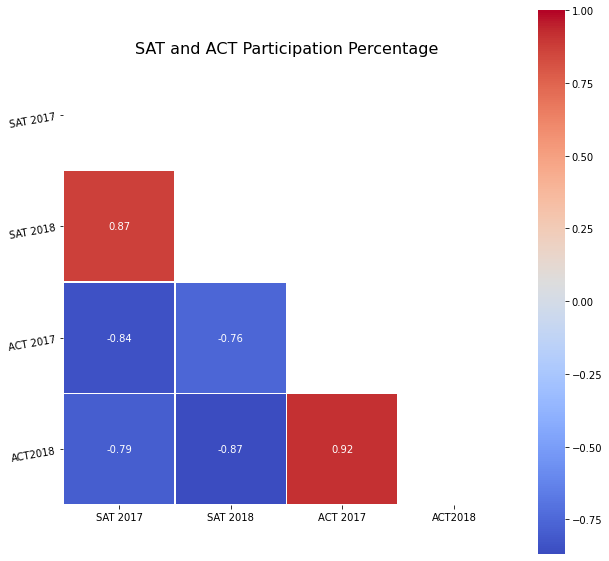

In [118]:
plt.figure(figsize=(10,10));

corr = participation_heat_map.corr();

mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.title('SAT and ACT Participation Percentage', fontsize=16);

participation_heatmap = sns.heatmap(corr, annot=True, mask = mask, linewidths=.7, square=True,
           xticklabels=['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT2018'], 
            yticklabels=['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT2018'],
                                   cmap='coolwarm');

participation_heatmap.set_yticklabels(participation_heatmap.get_yticklabels(), rotation=10, horizontalalignment='right');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [120]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=[12,20]); # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]); # feel free to add more settings
        ax[i].set_title(list_of_titles[i]); # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i]);
    plt.tight_layout();

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

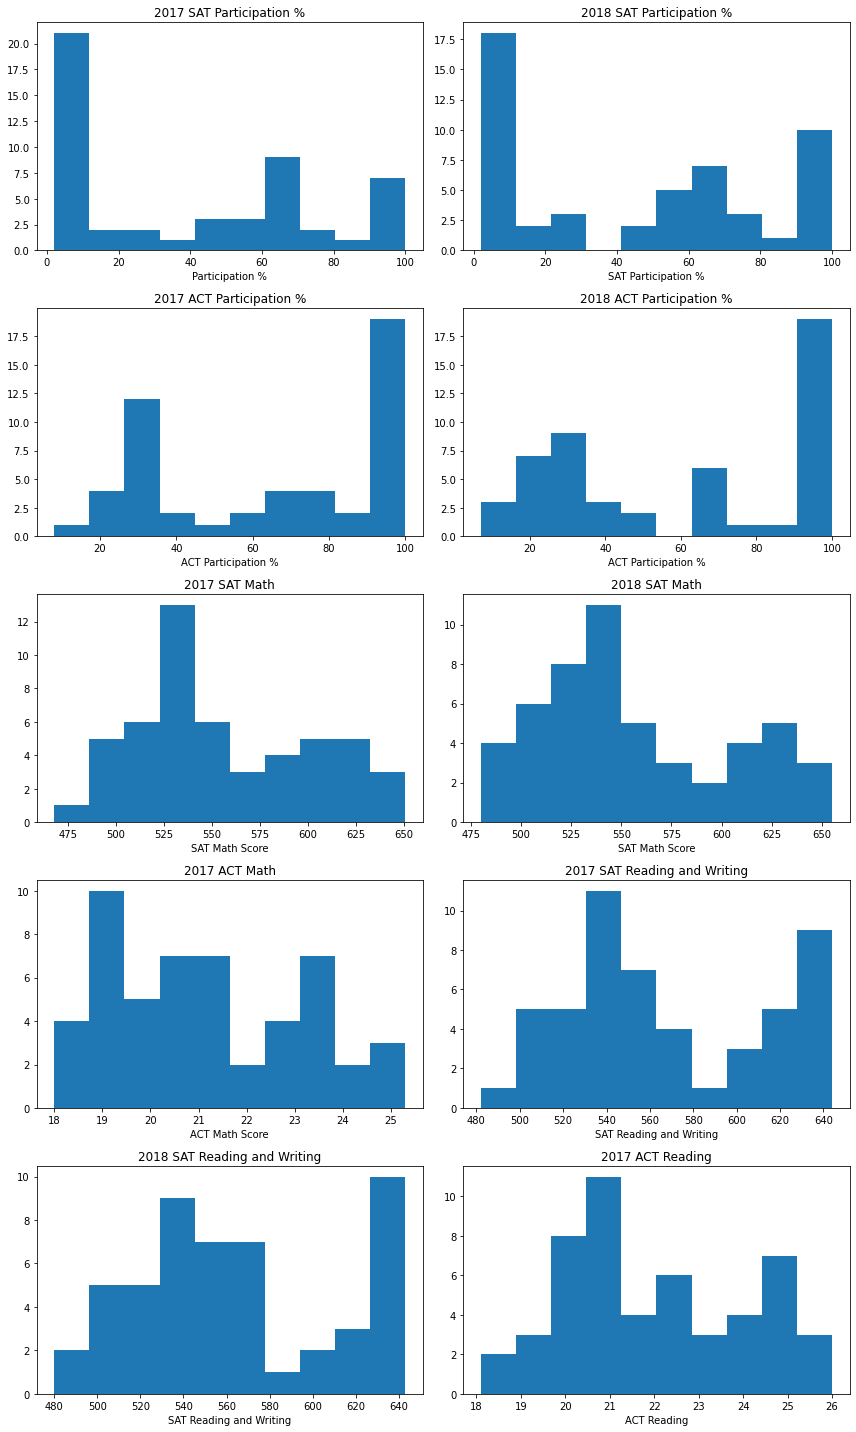

In [121]:
# Code
graph1 = ['2017_sat_participation_%', '2018_sat_participation_%', '2017_act_participation_%', 
          '2018_act_participation_%', '2017_sat_math', '2018_sat_math', '2017_act_math',
         '2017_reading_and_writing', '2018_reading_and_writing', '2017_reading']

titles = ['2017 SAT Participation %', '2018 SAT Participation %', '2017 ACT Participation %', 
          '2018 ACT Participation %', '2017 SAT Math', '2018 SAT Math', '2017 ACT Math',
         '2017 SAT Reading and Writing', '2018 SAT Reading and Writing', '2017 ACT Reading']

labels = ['Participation %', 'SAT Participation %', 'ACT Participation %', 
          'ACT Participation %', 'SAT Math Score', 'SAT Math Score', 'ACT Math Score',
         'SAT Reading and Writing', 'SAT Reading and Writing', 'ACT Reading']

subplot_histograms(final, graph1, titles,labels);

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [122]:
def scatter_plot(dataframe, list_of_columns, title, ylabel, xlabel):
    plt.figure(figsize=(14,9))
    plt.scatter(dataframe[list_of_columns[0]], dataframe[list_of_columns[1]])
    plt.title(title)
    plt.ylabel(ylabel, fontsize = 12)
    plt.xlabel(xlabel, fontsize = 12)

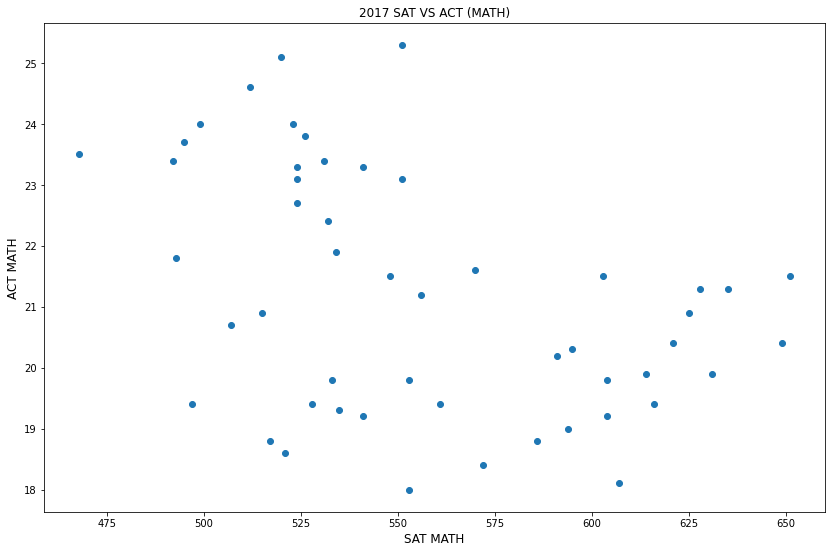

In [123]:
scatter_plot(final, ['2017_sat_math', '2017_act_math'], '2017 SAT VS ACT (MATH)', 'ACT MATH','SAT MATH')

### There is no relationship between SAT Math and ACT Math scores.

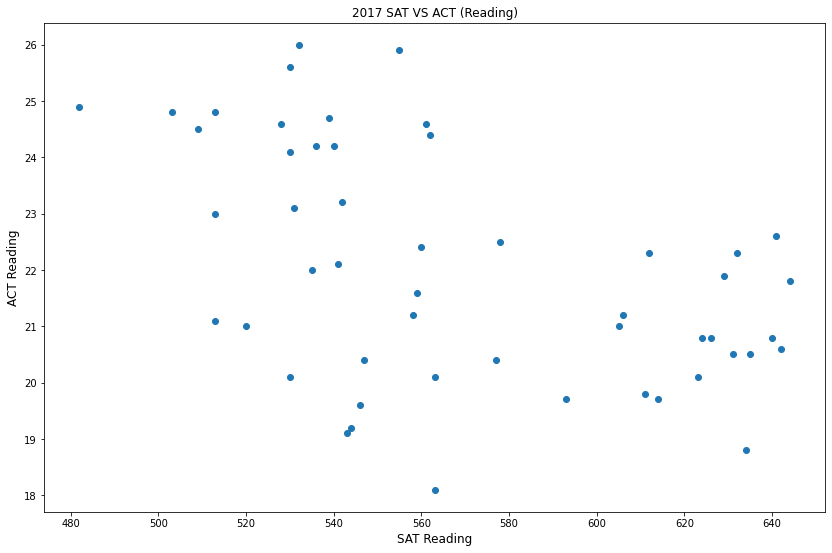

In [124]:
scatter_plot(final, ['2017_reading_and_writing', '2017_reading'], '2017 SAT VS ACT (Reading)', 'ACT Reading','SAT Reading')

### There is no relationship between SAT Reading and ACT Reading scores.

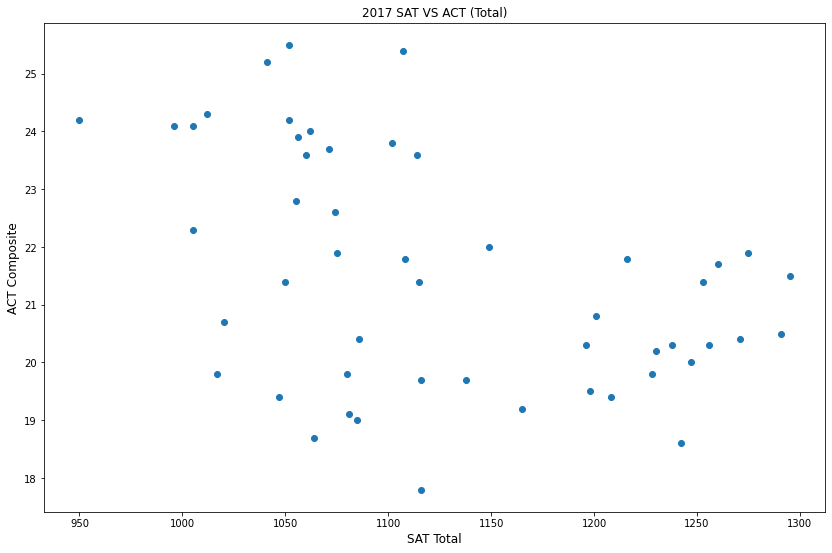

In [125]:
scatter_plot(final, ['2017_total', '2017_composite'], '2017 SAT VS ACT (Total)', 'ACT Composite','SAT Total')

### There is no relationship between SAT total and ACT total scores.

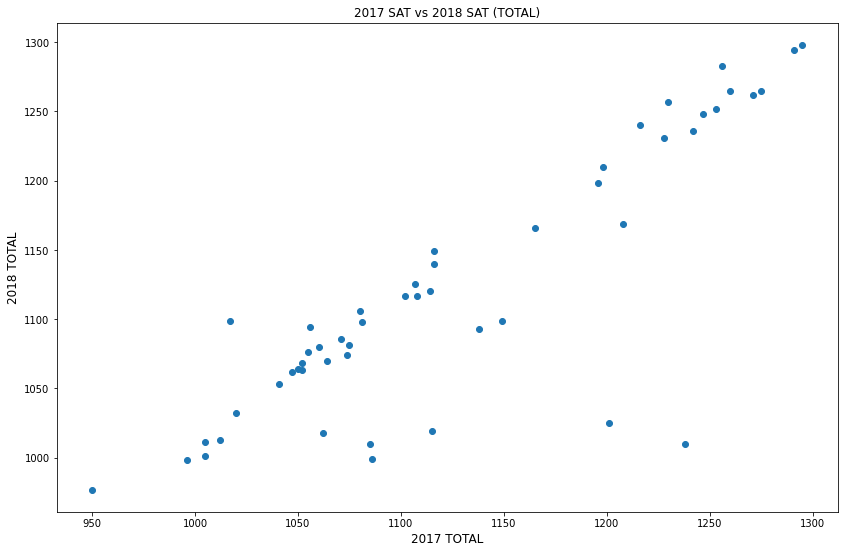

In [129]:
scatter_plot(final, ['2017_total', '2018_total'], '2017 SAT vs 2018 SAT (TOTAL)', '2018 TOTAL','2017 TOTAL')

### There is a positive relationship between 2017 SAT total and 2018 SAT total score.

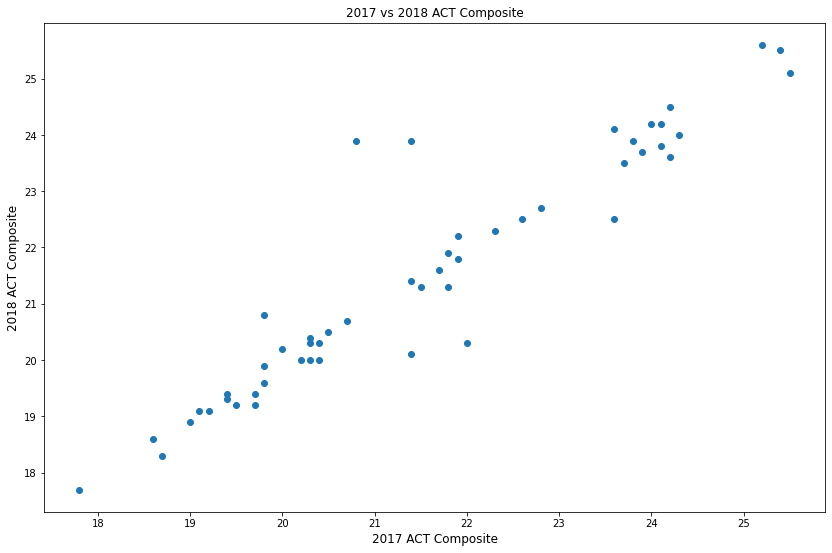

In [127]:
scatter_plot(final, ['2017_composite', '2018_composite'], '2017 vs 2018 ACT Composite', '2018 ACT Composite', '2017 ACT Composite' )

### There is a positive relationship between 2017 ACT composite and 2018 ACT composite.


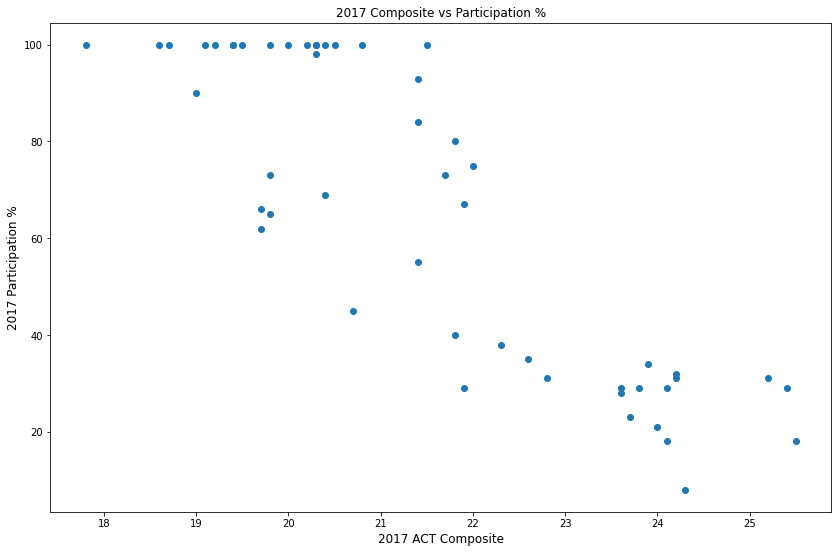

In [130]:
scatter_plot(final, ['2017_composite', '2017_act_participation_%'], '2017 Composite vs Participation %', '2017 Participation %', '2017 ACT Composite' )

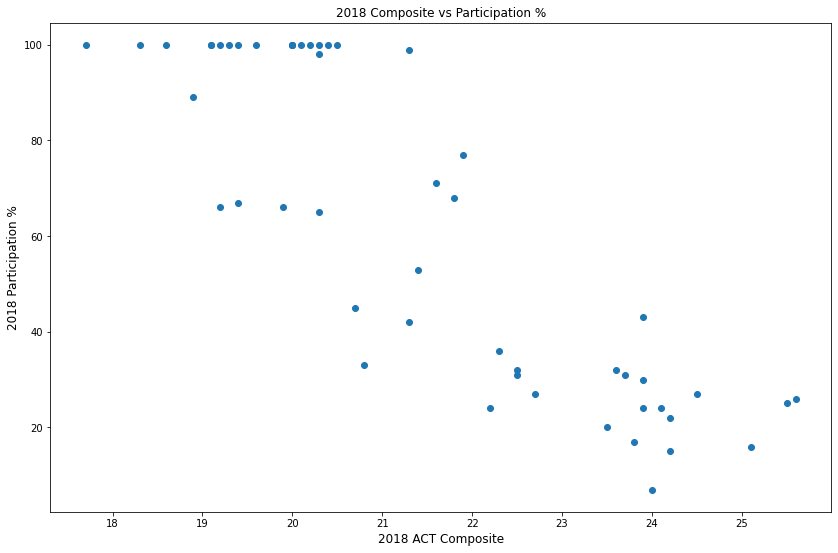

In [131]:
scatter_plot(final, ['2018_composite', '2018_act_participation_%'], '2018 Composite vs Participation %', '2018 Participation %', '2018 ACT Composite' )

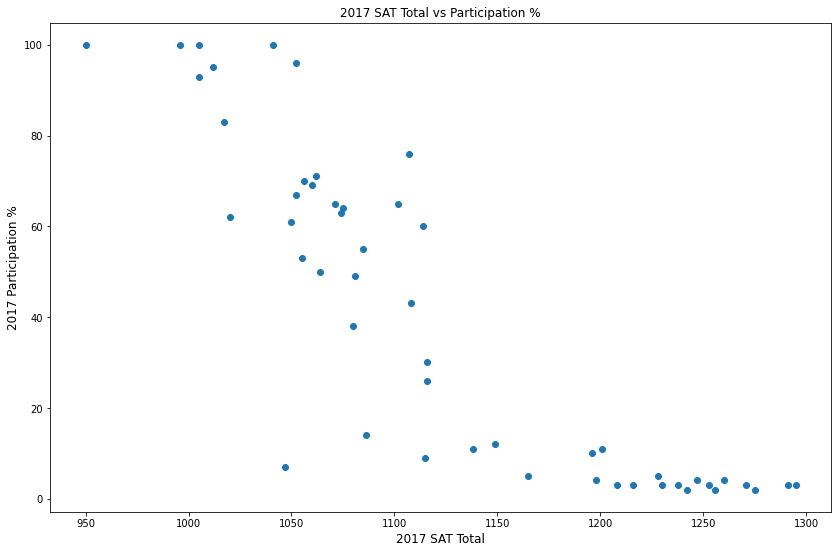

In [132]:
scatter_plot(final, ['2017_total', '2017_sat_participation_%'], '2017 SAT Total vs Participation %', '2017 Participation %', '2017 SAT Total' )

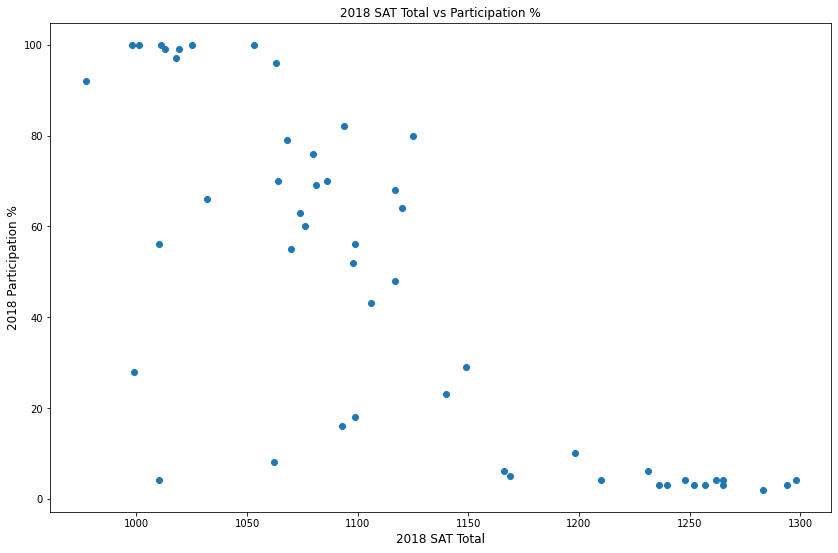

In [133]:
scatter_plot(final, ['2018_total', '2018_sat_participation_%'], '2018 SAT Total vs Participation %', '2018 Participation %', '2018 SAT Total' )

This one in interesting because the relationship between scores and participation are negative. The lower the participation rate, the higher the score. This may be explained by the a smaller size that causes the scores to be higher. In addition, it could also mean that students who took SAT in lower participation percentage states are more likely to be concerned about getting admitted to their target school so that they are trying taking both tests. Students may choose to report the test that they scored the highest. Other explanations may involve the education policies in individual states. Some states subsidy the ACT or the SAT so that if students are taking the SAT in a state where it is not subsidized, it could possibly mean that the student comes from a family with higher income which could be a factor that positively affects SAT scores. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

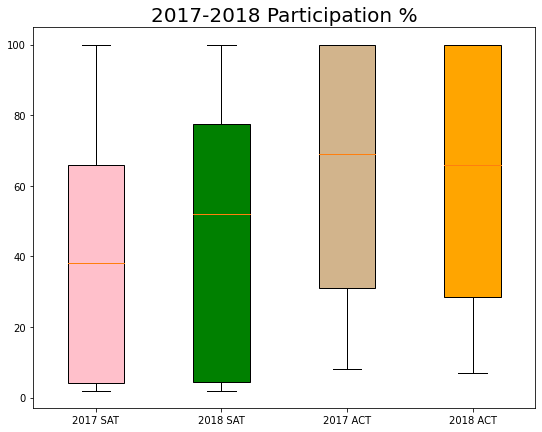

In [134]:
def box_plots(dataframe, box_labels, title):
    fig, ax = plt.subplots(figsize=(9,7))
    box = ax.boxplot(dataframe, patch_artist=True, labels = box_labels)
    colors = ['pink', 'green', 'tan', 'orange']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.title(title, size=20)
    

box_plots([final['2017_sat_participation_%'], final['2018_sat_participation_%'], 
           final['2017_act_participation_%'], final['2018_act_participation_%']], 
          ['2017 SAT', '2018 SAT', '2017 ACT', '2018 ACT'], "2017-2018 Participation %");


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

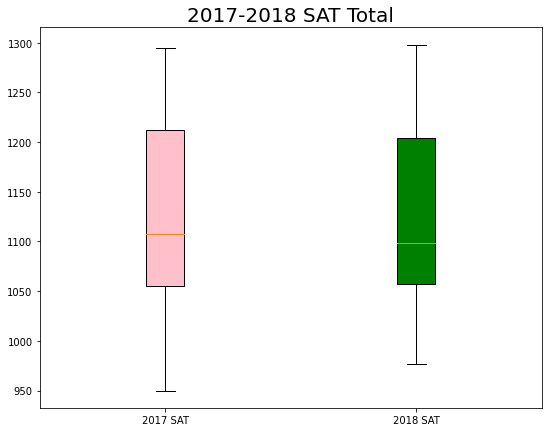

In [135]:
box_plots([final['2017_total'], final['2018_total']],
          ['2017 SAT', '2018 SAT'], "2017-2018 SAT Total");

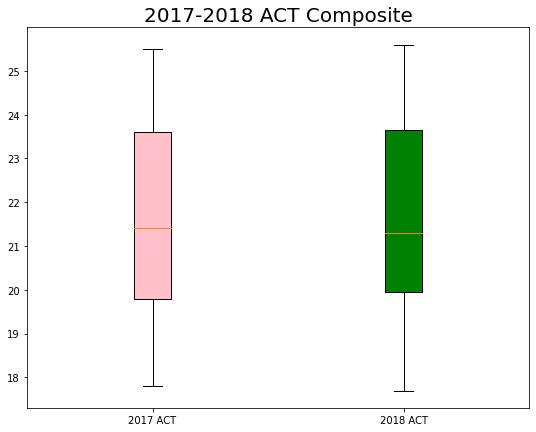

In [136]:
box_plots([final['2017_composite'], final['2018_composite']],
          ['2017 ACT', '2018 ACT'], "2017-2018 ACT Composite");

In [137]:
illinois = final['state']== 'Illinois'
final.loc[illinois, general_info]

state  2017_sat_participation_%  2018_sat_participation_%  \
13  Illinois                       9.0                      99.0   

    sat_pct_change  2017_act_participation_%  2018_act_participation_%  \
13            90.0                      93.0                      43.0   

    act_pct_change  
13           -50.0

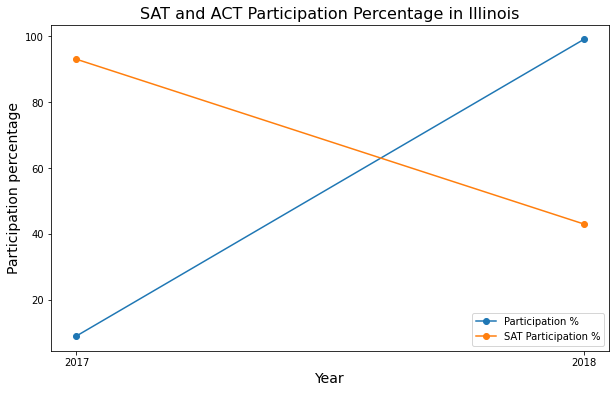

In [138]:
plt.figure(figsize=(10,6));

plt.plot([9, 99], marker="o")
plt.plot([93,43], marker='o')

plt.xticks([0, 1],['2017', '2018'])
plt.legend(labels);

plt.xlabel('Year', size=14);
plt.ylabel('Participation percentage', size = 14);

plt.title('SAT and ACT Participation Percentage in Illinois', size = 16);

In [139]:
ohio = final['state'] == 'Ohio'
final.loc[ohio, general_info]

state  2017_sat_participation_%  2018_sat_participation_%  sat_pct_change  \
35  Ohio                      12.0                      18.0             6.0   

    2017_act_participation_%  2018_act_participation_%  act_pct_change  
35                      75.0                     100.0            25.0

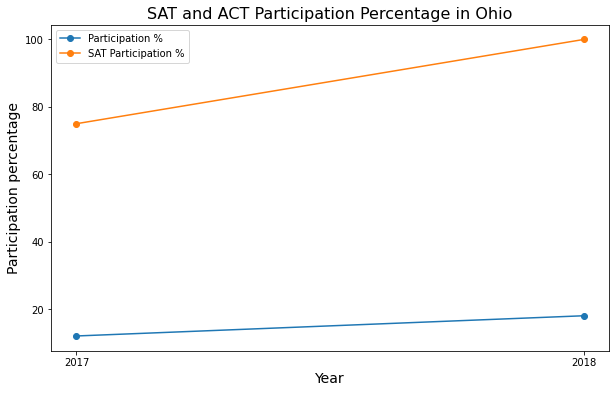

In [140]:
plt.figure(figsize=(10,6));



plt.plot([12, 18], marker="o")
plt.plot([75,100], marker='o')

plt.xticks([0, 1],['2017', '2018'])
plt.legend(labels);

plt.xlabel('Year', size=14);
plt.ylabel('Participation percentage', size = 14);

plt.title('SAT and ACT Participation Percentage in Ohio', size = 16);

In [141]:
west_virginia = final['state'] == 'West Virginia'
final.loc[west_virginia, general_info]

state  2017_sat_participation_%  2018_sat_participation_%  \
48  West Virginia                      14.0                      28.0   

    sat_pct_change  2017_act_participation_%  2018_act_participation_%  \
48            14.0                      69.0                      65.0   

    act_pct_change  
48            -4.0

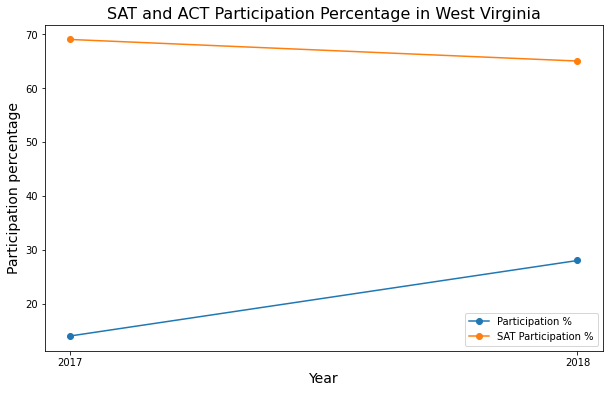

In [142]:
plt.figure(figsize=(10,6));

plt.plot([14, 28], marker="o")
plt.plot([69, 65], marker='o')

plt.xticks([0, 1],['2017', '2018'])
plt.legend(labels);

plt.xlabel('Year', size=14);
plt.ylabel('Participation percentage', size = 14);

plt.title('SAT and ACT Participation Percentage in West Virginia', size = 16);

In [143]:
california = final['state'] == 'California'
final.loc[california, general_info]

state  2017_sat_participation_%  2018_sat_participation_%  \
4  California                      53.0                      60.0   

   sat_pct_change  2017_act_participation_%  2018_act_participation_%  \
4             7.0                      31.0                      27.0   

   act_pct_change  
4            -4.0

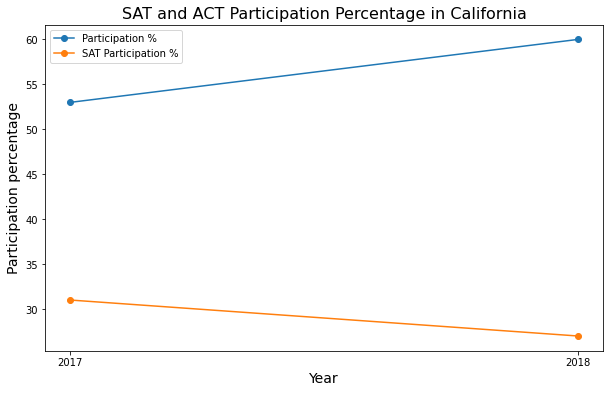

In [144]:
plt.figure(figsize=(10,6));

plt.plot([53, 60], marker="o")
plt.plot([31, 27], marker='o')

plt.xticks([0, 1],['2017', '2018'])
plt.legend(labels);

plt.xlabel('Year', size=14);
plt.ylabel('Participation percentage', size = 14);

plt.title('SAT and ACT Participation Percentage in California', size = 16);

In [145]:
wisconsin = final['state'] == 'Wisconsin'
final.loc[wisconsin, general_info]

state  2017_sat_participation_%  2018_sat_participation_%  \
49  Wisconsin                       3.0                       3.0   

    sat_pct_change  2017_act_participation_%  2018_act_participation_%  \
49             0.0                     100.0                     100.0   

    act_pct_change  
49             0.0

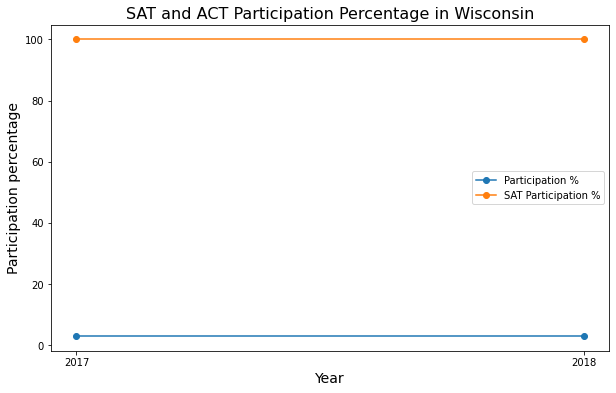

In [146]:
plt.figure(figsize=(10,6));

plt.plot([3, 3], marker="o")
plt.plot([100, 100], marker='o')

plt.xticks([0, 1],['2017', '2018'])
plt.legend(labels);

plt.xlabel('Year', size=14);
plt.ylabel('Participation percentage', size = 14);

plt.title('SAT and ACT Participation Percentage in Wisconsin', size = 16);

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.



2017map = '~/DSI/projects/project_1/images/2017 SAT and ACT.png'
2018map = '~/DSI/projects/project_1/images/2018 SAT and ACT.png'

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.



## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The three states that are beneficial to the analysis are California, West Virginia, and Ohio. Despite having a pretty decent percentage in SAT participation,  education policies in California are decided locally instead of statewide. While most states use the ACT or SAT to satisfy the federal requirement of administering summative test for all high school students, California's school districts can decide whether to administer ACT or SAT (1). The SAT participation in California increased from 53% to 60% while the ACT participation rate decreased from 31% to 27%. Unlike California, Illinois's drastic increase from 9% in 2017 to 99% in 2018 is due to the College Board securing a multi-year contract with the Illinois Department of Education (2). Since California has a decentralized education department, it is important to target individual school districts rather than spending money on lobbying the department of education at the state level.

Like California, Ohio does not have a contract with either testing services. The SAT participation rate of Ohio increased from 12% to 18% while the ACT participation increased from 75% to 100%. It is requiring schools to administer the ACT or the SAT (3). This gives College Board the opportunity to expand testing service by offering free testing materials. For example, if a student is taking an AP class and is expecting to take AP exam, College Board could offer more free test prep for those students. In general, expanding the testing base will be key to College Board. Students may be more likely to take a test with their friends so they are heavily influenced by peers. This cannot be inferred from the analysis with so few data, but it will be beneficial to the business development team if College Board can collect data on student behavior and how peers affect students' test choice. If College Board can offer test vouchers to after school programs that encourage students to sign up for the same testing date. This may help College Board to boost participation rate.

West Virginia is the third state of interest because the SAT participation, while low, is on the rise. The SAT participation rate increased from 14% to 28% while the ACT participation decreased from 69% to 65%. In 2018, West Virginia's state began to administer SAT tests to all high school students and this is the only test that will be recognized as admission require to the Promise program (4).

Sources:
1. Fensterward, John. “Growing number of California school districts offer students free college entrance exam”. https://edsource.org/2017/more-evidence-supports-school-districts-that-offer-free-satact-to-all-students/585696
2. Chen, Elaine. “Illinois has embraced the SAT, and the ACT is mad about it”. https://chalkbeat.org/posts/chicago/2018/07/27/act-protests-state-boards-embrace-of-rival-test-provider/
Ohio Department of Education, http://education.ohio.gov/Topics/Testing/State-Funded-SAT-Test
3. Quin, Ryan. “WV chooses SAT as new high school standardized test for juniors”. https://www.wvgazettemail.com/news/education/wv-chooses-sat-as-new-high-school-standardized-test-for/article_b60d2618-4943-56f6-b180-4b4442172ef8.html

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Since Ohio's state department does not endorse the ACT over the SAT, College Board may not be able to employ the same strategy in Illinois and Colorado where the the state signed a multi-year contract. However, there are creative ways to help College Board improve participation rate outside of lobbying.

College's other two core products: PSAT and AP are a great venue for the organization to gain insight on student behavior. While it cannot be confirmed in this data, students may choose to take tests that they are better prepared for because this leads to higher scores that are crucial to college admission. College Board should work towards administering state-funded PSAT to all 9th and 10th graders because the PSAT gives students a preview of the SAT. Next, the data team at College Board will be able to conduct A/B testing to see if students' participation in PSAT affect SAT.

To increase the participation rate of students in Ohio, College Board should consider giving students who are already taking AP class free test preps for the SAT. Students who are taking the SAT are already familiar with College Board so they might be more likely to take the SAT. Since Of course, this will require College Board to gather data on the percentage of students who take the SAT given that they are taking AP courses.

College Board can also provide free test vouchers to school districts that have lower participation rate. Free tests encourage students to try the test and their testimony may influence how their peers choose ACT or SAT.

### Additional Data
Some data that  would be beneficial in the analysis are:
1. The percentage of students who take AP participated in SAT.
2. The percentage of students who participated in PSAT took the SAT.
3. Students' major of interest in college .
4. Students' used test preps or not.  

There are a couple of conditional probabilities that would be interesting to look at if College Board can survey students from all the states:
1. The probability that a student will take the SAT given that the student took the ACT
2. The probability that a student will take the SAT given that the student took the PSAT
3. The probability the student will take the ACT given that student took the PSAT. 

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [147]:
final.describe()

2017_act_participation_%  2017_english  2017_act_math  2017_reading  \
count                 51.000000     51.000000      51.000000     51.000000   
mean                  65.254902     20.931373      21.182353     22.013725   
std                   32.140842      2.353677       1.981989      2.067271   
min                    8.000000     16.300000      18.000000     18.100000   
25%                   31.000000     19.000000      19.400000     20.450000   
50%                   69.000000     20.700000      20.900000     21.800000   
75%                  100.000000     23.300000      23.100000     24.150000   
max                  100.000000     25.500000      25.300000     26.000000   

       2017_science  2017_composite  2017_sat_participation_%  \
count     51.000000       51.000000                 51.000000   
mean      21.041176       21.519608                 39.803922   
std        3.182463        2.020695                 35.276632   
min        2.300000       17.800000                  2.000000   
25%       19.900000       19.800000                  4.000000   
50%       21.300000       21.400000                 38.000000   
75%       22.750000       23.600000                 66.000000   
max       24.900000       25.500000                100.000000   

       2017_reading_and_writing  2017_sat_math   2017_total  \
count                 51.000000      51.000000    51.000000   
mean                 569.117647     556.882353  1126.098039   
std                   45.666901      47.121395    92.494812   
min                  482.000000     468.000000   950.000000   
25%                  533.500000     523.500000  1055.500000   
50%                  559.000000     548.000000  1107.000000   
75%                  613.000000     599.000000  1212.000000   
max                  644.000000     651.000000  1295.000000   

       2018_act_participation_%  2018_composite  2018_sat_participation_%  \
count                 51.000000       51.000000                 51.000000   
mean                  61.725490       21.496078                 45.745098   
std                   34.037085        2.111583                 37.314256   
min                    7.000000       17.700000                  2.000000   
25%                   28.500000       19.950000                  4.500000   
50%                   66.000000       21.300000                 52.000000   
75%                  100.000000       23.650000                 77.500000   
max                  100.000000       25.600000                100.000000   

       2018_reading_and_writing  2018_sat_math   2018_total  sat_pct_change  \
count                 51.000000      51.000000    51.000000       51.000000   
mean                 563.686275     556.235294  1120.019608        5.941176   
std                   47.502627      47.772623    94.155083       18.271740   
min                  480.000000     480.000000   977.000000      -27.000000   
25%                  534.500000     522.500000  1057.500000        0.000000   
50%                  552.000000     544.000000  1098.000000        1.000000   
75%                  610.500000     593.500000  1204.000000        5.000000   
max                  643.000000     655.000000  1298.000000       90.000000   

       act_pct_change  
count       51.000000  
mean        -3.529412  
std         13.457121  
min        -70.000000  
25%         -4.000000  
50%         -1.000000  
75%          0.000000  
max         25.000000

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No, the histograms of the test scores are not nomally distributed. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: The scores are normal to the population mean of the scores, meaning the individual state's mean should be approximately normal to the population mean, the average score of all students who took the SAT according to the Central Limit Theorem. However, we do not observe this trend and this maybe to due to sampling issue. The issue here maybe due to the aggregate of state data. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: First we would have to disaggregate the data that is categorized by state right now. Without disaggregating the data, it would be meaningless and impossible to draw any conclusion on the population since it is interested in the high school population in the United States. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: It is not appropriate to compare the SAT and ACT math scores because they are graded on two different scales. You will have to convert one of the scores relative to the other to make any meaningful comparison. But this still doesn't make much sense because you are comparing two independent tests. If a student want to make an inference on what score he/she will receive in the ACT math score based on how he/she performed in the SAT math score, then it might be interesting.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: